<a id='1'></a>
## Python Libraries


In [77]:

import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split



##  Analyse Data

In [78]:
data = pd.read_csv('brest_cncer.csv')


Before making anything like feature selection,feature extraction and classification, firstly we start with basic data analysis. 
Lets look at features of data.

In [79]:
data.head()  # head method show only first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


1) There is an **id** that cannot be used for classificaiton 
2) **Diagnosis** is our class label
3) **Unnamed: 32** feature includes NaN so we do not need it.

Therefore, drop these unnecessary features.

In [80]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [81]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


c:\Users\Asus\Anaconda3\envs\tablet\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


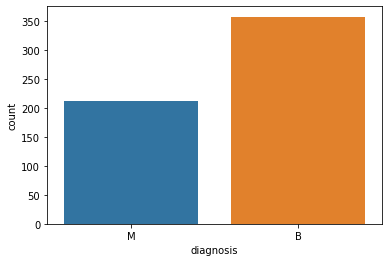

In [82]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [83]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Feature selection

<AxesSubplot:>

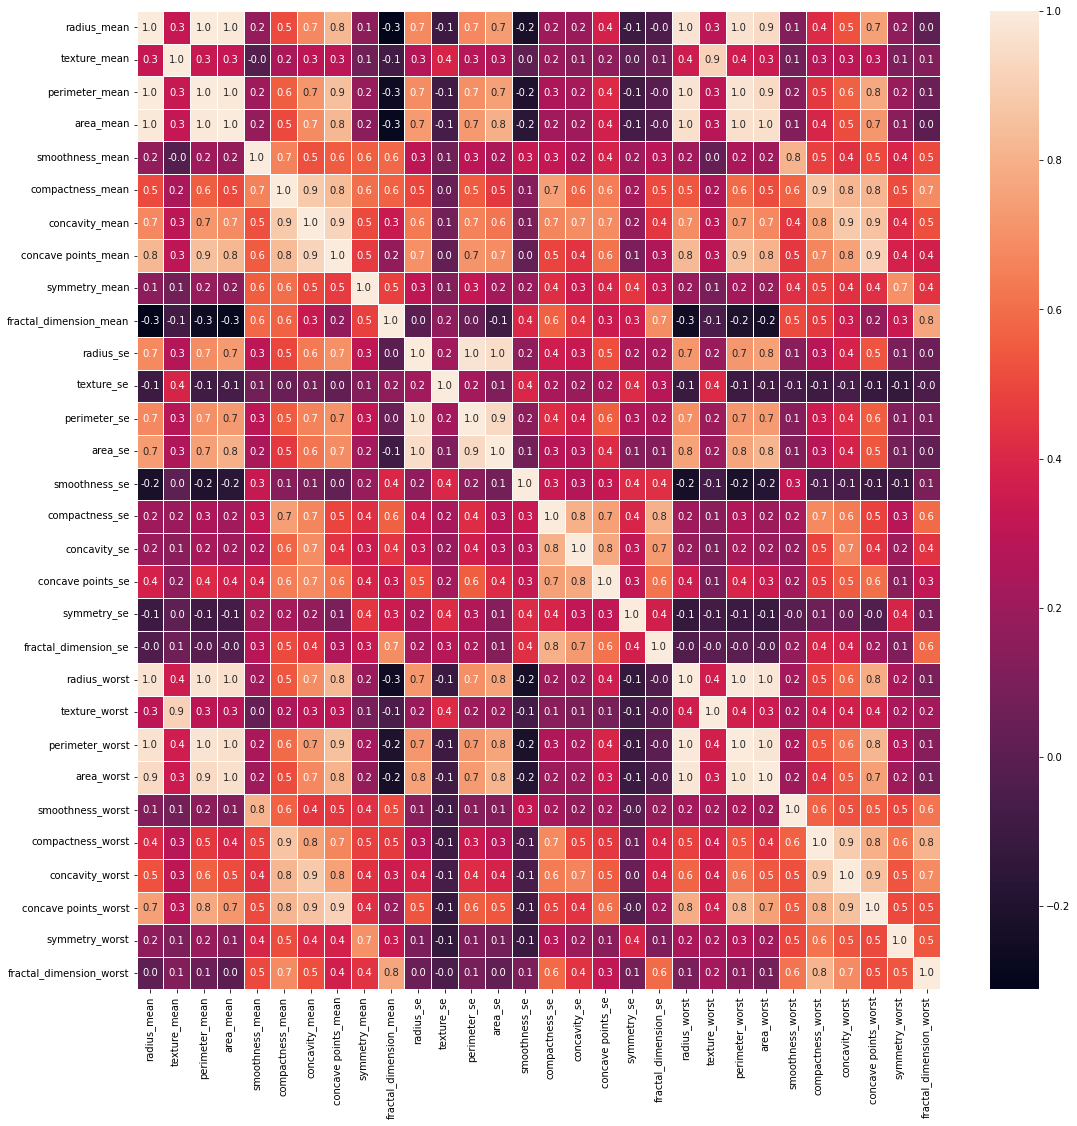

In [90]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**Compactness_mean, concavity_mean and concave points_mean** are correlated with each other.Therefore I only choose **concavity_mean**. Apart from these, **radius_se, perimeter_se and area_se** are correlated and I only use **area_se**.  **radius_worst, perimeter_worst and area_worst** are correlated so I use **area_worst**.  **Compactness_worst, concavity_worst and concave points_worst** so I use **concavity_worst**.  **Compactness_se, concavity_se and concave points_se** so I use **concavity_se**. **texture_mean and texture_worst are correlated** and I use **texture_mean**. **area_worst and area_mean** are correlated, I use **area_mean**.




In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()
y_1 = [0 if i =='B' else 1 for i in y  ]

    

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

<AxesSubplot:>

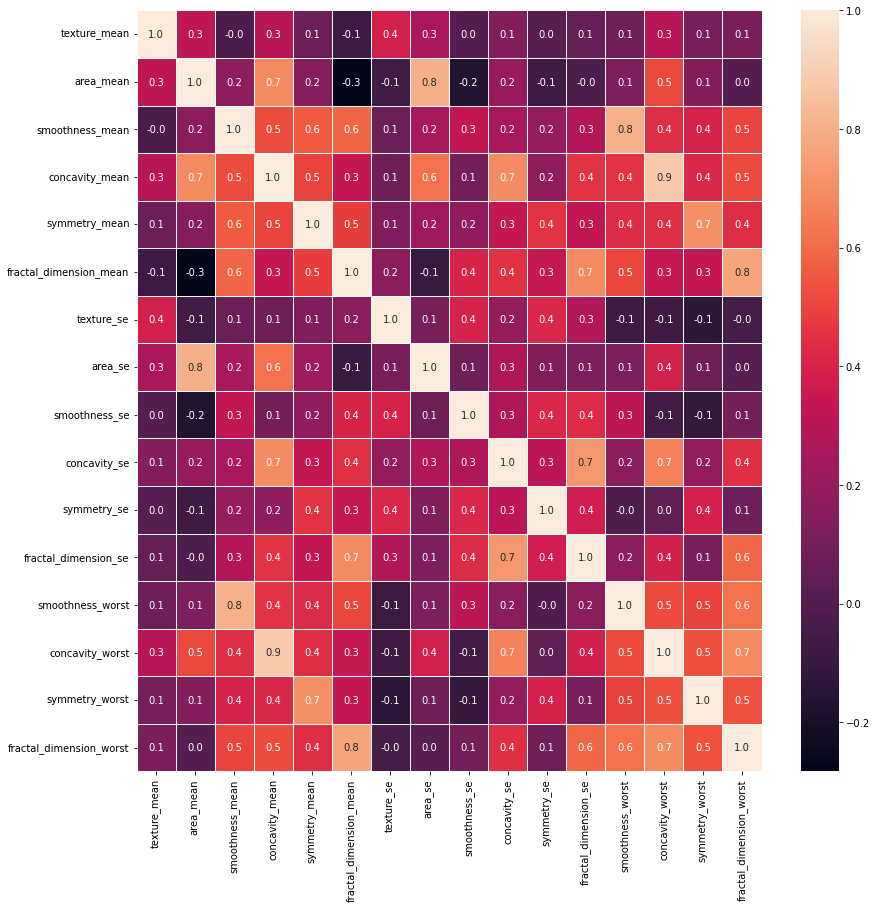

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.2, random_state=42)
x_train

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
68,17.33,250.5,0.10660,0.31300,0.2111,0.08046,1.1940,17.67,0.009549,0.303800,0.04197,0.009559,0.14820,1.25200,0.4228,0.11750
181,26.57,1311.0,0.11410,0.24870,0.2395,0.07398,0.7629,81.46,0.004253,0.038720,0.01798,0.005295,0.14910,0.67800,0.4098,0.12840
63,13.86,260.9,0.07721,0.05988,0.2341,0.06963,2.2650,23.52,0.008738,0.043120,0.04192,0.005822,0.09836,0.13970,0.3282,0.08490
248,25.22,347.0,0.09657,0.02379,0.1897,0.06329,1.4930,16.64,0.007189,0.010810,0.02158,0.002619,0.14990,0.11250,0.3409,0.08147
60,14.88,311.9,0.11340,0.01084,0.2743,0.06960,1.4410,34.62,0.007514,0.007665,0.04183,0.005953,0.12750,0.02168,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,14.64,244.0,0.09783,0.08606,0.1902,0.08980,0.8522,25.44,0.017210,0.056710,0.02541,0.021930,0.12070,0.14340,0.2254,0.10840
106,18.33,412.5,0.11420,0.07070,0.1801,0.06520,1.6570,20.62,0.008540,0.029450,0.01565,0.003840,0.16880,0.28730,0.2806,0.09097
270,16.82,632.6,0.06429,0.00725,0.1508,0.05376,0.7198,10.77,0.003492,0.004826,0.01536,0.001381,0.08567,0.03866,0.2458,0.06120
435,19.62,599.5,0.10600,0.11260,0.1669,0.06544,0.9533,18.85,0.005314,0.021850,0.01223,0.002846,0.16130,0.40690,0.3179,0.10550


# Neural Network

In [ ]:
from Neural_netwot_model import *
iterations = 15
n_h = 32
learning_rate = 0.02
Parameters, train_cost_list ,test_cost_list = model(train_input = x_train,train_output =  y_train, hidden_unit=  n_h, learning_rate = learning_rate, iterations = iterations ,test_input = x_test ,test_output = y_test)

In [ ]:
from tensorflow .keras.layers import Dense ,Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import CategoricalCrossentropy
input = Input(shape =(16,))
layer = Dense(32 ,activation = 'relu')(input)
layer = Dense(1 ,activation = 'sigmoid')(layer)
model = Model(inputs = input ,outputs = layer)

model.summary()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy',]
              )


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_24 (Dense)            (None, 32)                544       
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [ ]:

mnist = model.fit(np.array(x_train) ,np.array(y_train) ,epochs = 15  ,validation_data=(np.array(x_test) ,np.array(y_test)))

Epoch 1/15
15/15 [==============================] - 0s 7ms/step - loss: 0.2665 - accuracy: 0.8813 - val_loss: 0.1773 - val_accuracy: 0.9825
Epoch 2/15
15/15 [==============================] - 0s 4ms/step - loss: 0.2573 - accuracy: 0.8835 - val_loss: 0.1779 - val_accuracy: 0.9825
Epoch 3/15
15/15 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.8681 - val_loss: 0.2225 - val_accuracy: 0.8860
Epoch 4/15
15/15 [==============================] - 0s 8ms/step - loss: 0.2675 - accuracy: 0.8791 - val_loss: 0.1705 - val_accuracy: 0.9737
Epoch 5/15
15/15 [==============================] - 0s 12ms/step - loss: 0.2520 - accuracy: 0.8945 - val_loss: 0.1828 - val_accuracy: 0.9737
Epoch 6/15
15/15 [==============================] - 0s 9ms/step - loss: 0.2583 - accuracy: 0.9033 - val_loss: 0.2236 - val_accuracy: 0.8947
Epoch 7/15
15/15 [==============================] - 0s 4ms/step - loss: 0.2794 - accuracy: 0.8791 - val_loss: 0.1666 - val_accuracy: 0.9561
Epoch 8/15
15/15 [=

In [76]:
weight =  model.get_weights()
paarmeters['b1'] = weight[1]

Text(0.5, 0, 'epoch')

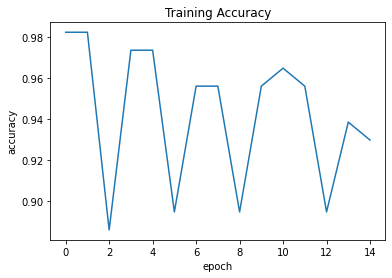

In [55]:
plt.plot(mnist.history['val_accuracy' ])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [87]:
with open('nn\breast_cancer_final_weight.json','w') as file:
    file.write(str(paarmeters) )

OSError: [Errno 22] Invalid argument: 'nn\x08reast_cancer_final_weight.json'

In [89]:
with open('nn/breast_cancer_final_weight.json','w') as file:
    file.write(str(paarmeters) )

In [71]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

paarmeters = initialize_parameters(16,32,1)

In [70]:








from sklearn.metrics import classification_report
yp = model.predict(np.array((x_test)))
print(classification_report(np.array(y_test) ,np.round(yp)))



4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        71
           1       1.00      0.81      0.90        43

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



In [67]:
np.round(yp).shape

(114, 1)

In [69]:
np.array(y_test).shape

(114,)